This is deliberately open ended. There is no starter code. It's up to you how to acquire the data, store the data, and what features you want to use. 

We expect you to use a **tree-based model**, but the rest of the decisions are up to you. 

We will be looking for the following things:
 - A clear problem statement & description of the goals of your study to be included in the final report
 - Data from IMDB
 - Cleaned and refined data
 - Visualization. Plots that describe your data and evaluate your model.
 - Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting). 
 - A blog post presenting the results of your findings as a report to Netflix, including:
  - a problem statement,
  - summary statistics of the various factors (e.g. year, number of ratings, etc.),
  - your model,
  - at least 2 graphics,
  - and your recommendations for next steps!


## Problem Statement

Factors of eliteness of director, amount of top actors, and number of oscars/other awards will effect whether the IMDB rating is High or Low 

Assumptions:
    The data is a reflection of the larger imdb dataset

## Import packages

In [1]:
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
import collections

In [3]:
import omdb

In [4]:
from imdbpie.objects import Review

In [5]:
from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True)

## Started with code I decided not to use

## Code used to complete model

In [6]:
##FROM LAB
#create function to get the top 250 movies 
def get_top_250():
    response = requests.get('http://www.imdb.com/chart/top')
    html = response.text
    
    #return the text from all links
    entries = re.findall("<a href.*?/title/(.*?)/", html)
    return list(set(entries))

In [7]:
#call function for top movies
entries = get_top_250()

In [8]:
len(entries)

250

In [9]:
#Get data for each title

def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [10]:
entries_dict_list = [get_entry(e) for e in entries]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [11]:
#check output
len(entries_dict_list)

250

In [12]:
#create dataframe
df = pd.DataFrame(entries_dict_list)

In [13]:
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,A promising young drummer enrolls at a cut-thr...,https://images-na.ssl-images-amazon.com/images...,R,15 Oct 2014,True,107 min,Whiplash,movie,Damien Chazelle,2014,tt2582802,8.5,"413,720"
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,A poor village under attack by bandits recruit...,https://images-na.ssl-images-amazon.com/images...,UNRATED,19 Nov 1956,True,207 min,Seven Samurai,movie,"Akira Kurosawa (screenplay), Shinobu Hashimoto...",1954,tt0047478,8.7,"232,249"
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,Archaeologist and adventurer Indiana Jones is ...,https://images-na.ssl-images-amazon.com/images...,PG,12 Jun 1981,True,115 min,Raiders of the Lost Ark,movie,"Lawrence Kasdan (screenplay), George Lucas (st...",1981,tt0082971,8.5,"671,034"
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, War","English, Japanese, Thai",N/A,After settling his differences with a Japanese...,https://images-na.ssl-images-amazon.com/images...,PG,14 Dec 1957,True,161 min,The Bridge on the River Kwai,movie,"Pierre Boulle (novel), Carl Foreman (screenpla...",1957,tt0050212,8.2,"151,604"
4,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,Joss Whedon,"Action, Sci-Fi, Thriller","English, Russian",69,Earth's mightiest heroes must come together an...,https://images-na.ssl-images-amazon.com/images...,PG-13,04 May 2012,True,143 min,The Avengers,movie,"Joss Whedon (screenplay), Zak Penn (story), Jo...",2012,tt0848228,8.1,"1,010,033"


In [14]:
#describe dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        250 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      250 non-null object
Metascore     250 non-null object
Plot          250 non-null object
Poster        250 non-null object
Rated         250 non-null object
Released      250 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


In [15]:
#make copy
df2=df

In [16]:
#check columns
df2.columns

Index([u'Actors', u'Awards', u'Country', u'Director', u'Genre', u'Language',
       u'Metascore', u'Plot', u'Poster', u'Rated', u'Released', u'Response',
       u'Runtime', u'Title', u'Type', u'Writer', u'Year', u'imdbID',
       u'imdbRating', u'imdbVotes'],
      dtype='object')

In [17]:
#Ran but didnt want to bog down the notebook
df2['Awards'].value_counts(5)

3 wins.                                                                0.016
N/A                                                                    0.016
2 wins.                                                                0.012
1 win & 1 nomination.                                                  0.008
Won 3 Oscars. Another 10 wins & 16 nominations.                        0.008
Nominated for 1 BAFTA Film Award. Another 3 wins & 2 nominations.      0.008
1 win.                                                                 0.008
2 wins & 1 nomination.                                                 0.008
Won 2 Oscars. Another 25 wins & 21 nominations.                        0.004
7 wins & 1 nomination.                                                 0.004
Nominated for 1 Oscar. Another 2 wins & 7 nominations.                 0.004
Nominated for 3 Oscars. Another 16 wins & 42 nominations.              0.004
Won 5 Oscars. Another 5 wins & 1 nomination.                           0.004

In [18]:
#create vectorizer to find how many oscars have been won
cv = CountVectorizer(token_pattern=u'(?<=[Ww]on)(.*)(?=[Oo]scar)')


In [19]:
# fit and run vectorizer
oscars = cv.fit_transform(df2.Awards).todense()
#give column names with oscars:
columns = ['oscars: '+c for c in cv.get_feature_names()]
#create dataframe from dummies
oscarsdf = pd.DataFrame(oscars, columns=columns)

In [20]:
oscarsdf.head()

,oscars: 1,oscars: 11,oscars: 2,oscars: 3,oscars: 4,oscars: 5,oscars: 6,oscars: 7,oscars: 8
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0


In [21]:
#check
oscarsdf['oscars:  3 '].value_counts()

0    233
1     17
Name: oscars:  3 , dtype: int64

In [22]:
#create vectorizer for other wins
cv2 = CountVectorizer(token_pattern=u'(?<=[Aa]nother)(.*)(?=[Ww]in)')


In [23]:
# fit and run vectorizer
otherwins = cv2.fit_transform(df2.Awards).todense()

#make column names
columns2 = [c for c in cv2.get_feature_names()]

#make dummies into dataframe
otherwinsdf = pd.DataFrame(otherwins, columns=columns2)

In [24]:
#strip column names and convert to integers
otherwinsdf.columns=[int(x.strip()) for x in otherwinsdf.columns ]

In [25]:
#test
otherwinsdf.columns

Int64Index([  1,  10, 101, 103, 105, 108,  11, 112, 114,  12, 122, 124,  13,
            143, 146,  15, 155,  16,  17, 174,  18,  19,   2,  20, 207,  21,
             22,  23, 234,  25,  26,  27,  28,   3,  30,  31,  32,  33,  34,
             35,  36,  37,  38,  39,   4,  44,  46,  47,  48,   5,  51,  52,
             53,  54,  56,  58,   6,  60,  62,  64,  65,  67,   7,  71,  73,
             74,  75,  77,  79,   8,  84,  86,  87,   9,  90,  91,  94],
           dtype='int64')

In [26]:
#sort columns
otherwinsdf.sort(axis=1, inplace=True)

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


In [27]:
#Realized it would be better to bin wins over having this many dummy columns
otherwinsdf.head()

,1,2,3,4,5,6,7,8,9,10,...,112,114,122,124,143,146,155,174,207,234
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#replace all 1's with the name of the column so that the value shows how many other awards the movie won
otherwinsdf=otherwinsdf.T.apply(lambda x:np.where(x==1,x.index,0)).T

In [29]:
#sum across all columns of wins
df2['totalotherwins']=otherwinsdf.sum(axis=1)      

# Visualize other wins

In [30]:

otherwinsgraph=df2['totalotherwins'].value_counts().to_frame()

In [31]:
otherwinsgraph.reset_index(level=0, inplace=True)

In [32]:
otherwinsgraph.sort(columns='index', inplace=True)

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [33]:
otherwinsgraph=otherwinsgraph.iloc[1:, :]

In [34]:
plt.style.use('fivethirtyeight')

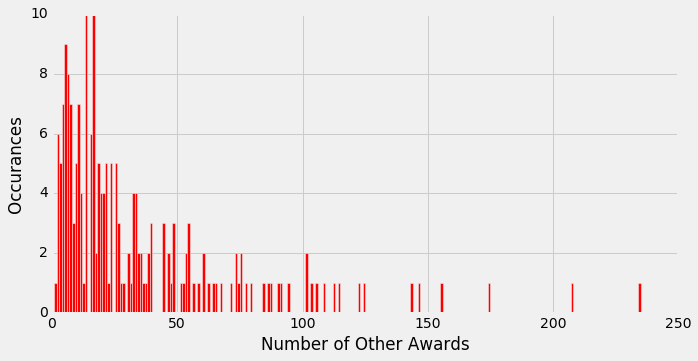

In [35]:
plt.figure(figsize=(10,5))
plt.bar(otherwinsgraph['index'], otherwinsgraph['totalotherwins'], width=1, color='red')
plt.ylabel('Occurances')
plt.xlabel('Number of Other Awards')


# Bin Other Wins

In [36]:
#find IQR bins
q75, q50, q25 = np.percentile(df2['totalotherwins'], [75, 50 ,25])

In [37]:
q75, q50, q25

(34.0, 15.0, 4.0)

In [38]:
#create bins
bins = [0, 4, 15, 34, 300]
group_names =['1-4 wins', '5-15 wins','16-34 wins', '35+ wins']


In [39]:
#force categories into dataframe
df2['otherwinsbin'] = pd.cut(df2['totalotherwins'], bins, labels=group_names)

In [40]:
#check columns
df2.columns

Index([        u'Actors',         u'Awards',        u'Country',
             u'Director',          u'Genre',       u'Language',
            u'Metascore',           u'Plot',         u'Poster',
                u'Rated',       u'Released',       u'Response',
              u'Runtime',          u'Title',           u'Type',
               u'Writer',           u'Year',         u'imdbID',
           u'imdbRating',      u'imdbVotes', u'totalotherwins',
         u'otherwinsbin'],
      dtype='object')

# Seperate target into two categories

In [41]:
#make rating into floats
df2['imdbRating']= [float(x) for x in df2['imdbRating']]

In [42]:
#find mean of all ratings (can be used if needed to apply to larger dataset)
mean=df2['imdbRating'].mean()
#create dummies from above or below the mean
df2['ratingHorL']=[1 if x>mean else 0 for x in df2['imdbRating']]

# Compare actors and directors  to outsourced data from AMC

In [43]:
#create list from actors (4 different actors for each movie)
df2['ActorsLst']=[x.split(', ') for x in df2['Actors']]

In [44]:
#top actors list scrape from AMC
topactors=[]
r = requests.get('http://www.amc.com/movie-guide/the-50-greatest-actresses-of-all-time')
soup=BeautifulSoup(r.content, 'lxml')
for x in soup.findAll("div", class_ = "list-i-title" ):
    topactors.append(x.text)
    
r2 = requests.get('http://www.amc.com/movie-guide/the-50-greatest-actors-of-all-time')
soup2=BeautifulSoup(r2.content, 'lxml')
for x in soup2.findAll("div", class_ = "list-i-title" ):
    topactors.append(x.text)

#test to be sure I have all 100 actors
len(topactors)

100

In [45]:
#count how many actors from each movie are listed in AMC's greatest actors/actresses of all time
movietopcount=[]
for x in df2['ActorsLst']:
    topcount=0
    for name in x:
        if name in topactors:
            topcount=topcount+1
    movietopcount.append(topcount)         

In [46]:
#create new column with top actor counts for each movie
df2['movietopcount']=movietopcount

In [47]:
#check 
df2['Director'].nunique()

157

In [48]:
#import directors list
topdirectorslst=[]
r = requests.get('http://www.amc.com/movie-guide/the-50-greatest-directors-of-all-time')
soup=BeautifulSoup(r.content, 'lxml')
for x in soup.findAll("div", class_ = "list-i-title" ):
    topdirectorslst.append(x.text)

#check to be sure all 50 directors were scraped
len(topdirectorslst)

50

In [49]:
#create new data to say if a director was in the top list or not
topdirect=[]
for x in df2['Director']:
    if x in topdirectorslst:
        topdirect.append(1)
    else:
        topdirect.append(0)

In [50]:
#create new column with above info
df2['topdirect']=topdirect

In [51]:
#concat all features together
df3=pd.concat([df2[['topdirect', 'movietopcount', 'otherwinsbin']], oscarsdf], axis=1)

In [52]:
#CHANGE OTHER WINS BIN INTO DUMMIES
df3['otherwinsbin'] = df3['otherwinsbin'].astype(str)

df3.loc[df3['otherwinsbin'] == 'nan','otherwinsbin'] = 0

In [53]:
import patsy
otherwins2= patsy.dmatrix('~ C(otherwinsbin)', df3)

In [54]:
otherwins2

DesignMatrix with shape (250, 5)
  Columns:
    ['Intercept',
     'C(otherwinsbin)[T.1-4 wins]',
     'C(otherwinsbin)[T.16-34 wins]',
     'C(otherwinsbin)[T.35+ wins]',
     'C(otherwinsbin)[T.5-15 wins]']
  Terms:
    'Intercept' (column 0), 'C(otherwinsbin)' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

In [55]:
otherwins2=pd.DataFrame(otherwins2, columns=['Intercept',
     '1-4 wins',
     '16-34 wins',
     '35+ wins',
     '5-15 wins'])

In [56]:
#add new dummies to features
df_f_model=pd.concat([df3, otherwins2], axis=1)

In [57]:
#remove unecassary features
X=df_f_model.drop('otherwinsbin', axis=1)

In [58]:
#drop intercept
X=X.drop('Intercept', axis=1)

In [59]:
#define target
y=df2['ratingHorL']

X=CONCAT OSCARS with ACTORS, OTHER WINS 



Y= RATING (above or below mean)

## MODELS

In [60]:
##FROM LAB WEEK 6 DAY 5
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

#create a function that evaluates the model once built
def evaluate_model(model):
    #fit model on train
    model.fit(X_train, y_train)
    
    #predict High or Low based on test
    y_pred = model.predict(X_test)
    
    #create accuracy between the actual ratings and the predicted ratings
    a = accuracy_score(y_test, y_pred)
    
    #create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #create a classification report, which includes f1 score
    cr = classification_report(y_test, y_pred)
    
    #return elements built above
    print cm
    print cr
    
    return a

#create empty dictionary to input scores
all_models = {}

# Decision Tree

In [61]:
#import
from sklearn.tree import DecisionTreeClassifier

#create decision tree model
dt = DecisionTreeClassifier()

#add model to dictionary
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

[[41 12]
 [16  6]]
             precision    recall  f1-score   support

          0       0.72      0.77      0.75        53
          1       0.33      0.27      0.30        22

avg / total       0.61      0.63      0.61        75



In [62]:
from sklearn.grid_search import GridSearchCV

In [63]:
#create dictionary of possible parmaters for the gridsearch
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}
#perform gridsearch
gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

#call function on best params and best score
all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 5, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}
0.7
[[50  3]
 [18  4]]
             precision    recall  f1-score   support

          0       0.74      0.94      0.83        53
          1       0.57      0.18      0.28        22

avg / total       0.69      0.72      0.66        75



In [64]:
#import
from sklearn.ensemble import BaggingClassifier

In [65]:
#bagging dictionary to be passed into gridsearch
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}

In [66]:
#run gridsearch on decision tree clasifier
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

#run model function 
all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': False}
0.684
[[50  3]
 [20  2]]
             precision    recall  f1-score   support

          0       0.71      0.94      0.81        53
          1       0.40      0.09      0.15        22

avg / total       0.62      0.69      0.62        75



## Random Forest & Extra Trees w/ gridsearch

In [67]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#call RT class
rf = RandomForestClassifier()

#call function to run model
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}


#call ET class
et = ExtraTreesClassifier()

#call function to run model
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[43 10]
 [16  6]]
             precision    recall  f1-score   support

          0       0.73      0.81      0.77        53
          1       0.38      0.27      0.32        22

avg / total       0.63      0.65      0.64        75

[[44  9]
 [17  5]]
             precision    recall  f1-score   support

          0       0.72      0.83      0.77        53
          1       0.36      0.23      0.28        22

avg / total       0.61      0.65      0.63        75



In [68]:
#define options for gridsearch
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}

#run gridsearch
gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

#call function to run model and find score
all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'gini', 'max_depth': 5, 'class_weight': None}
0.688
[[49  4]
 [19  3]]
             precision    recall  f1-score   support

          0       0.72      0.92      0.81        53
          1       0.43      0.14      0.21        22

avg / total       0.63      0.69      0.63        75



In [69]:
#run gridsearch on RT
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gset.fit(X, y)
print gset.best_params_
print gset.best_score_

#call function to run model and find score
all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 5, 'criterion': 'gini', 'max_depth': 3, 'class_weight': None}
0.684
[[46  7]
 [19  3]]
             precision    recall  f1-score   support

          0       0.71      0.87      0.78        53
          1       0.30      0.14      0.19        22

avg / total       0.59      0.65      0.61        75



,score
model,
gsdt,0.720000
gsrf,0.693333
gsbaggingdt,0.693333
rf,0.653333
gset,0.653333
et,0.653333
dt,0.626667


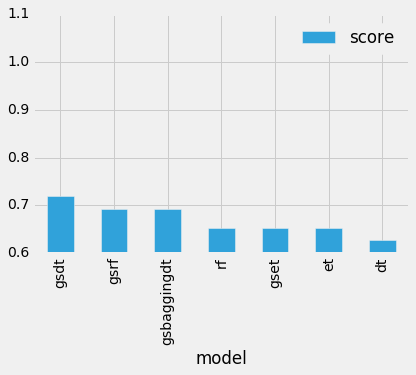

In [70]:
#return compilation of all scores for models run & graoh
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

In [71]:
#details of all models run
all_models

{'dt': {'model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              presort=False, random_state=None, splitter='best'),
  'score': 0.62666666666666671},
 'et': {'model': ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False),
  'score': 0.65333333333333332},
 'gsbaggingdt': {'model': BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
              max_features=None, max_leaf_nodes=None, min_samples_leaf=2,
              min_samples_split=5, min_weight_fraction_leaf=0.0,

In [72]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

#define function that finds the cross val score of all the models previously ran
def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

#itterate through the names of the models and the details 
for k, v in all_models.iteritems():
    # call previous function to find cross validation score
    cvres = retest(v['model'])
    
    #print name to confirm it was run
    print k, 
    
    #save scores to new row in column cvres
    all_models[k]['cvres'] = cvres
    

gsrf rf gsbaggingdt gsdt gset et dt


                score     error
model                          
gset         0.675942  0.017982
gsbaggingdt  0.675846  0.030928
gsrf         0.656005  0.014782
rf           0.647925  0.023722
et           0.607908  0.017021
dt           0.599684  0.055998
gsdt         0.596099  0.018125


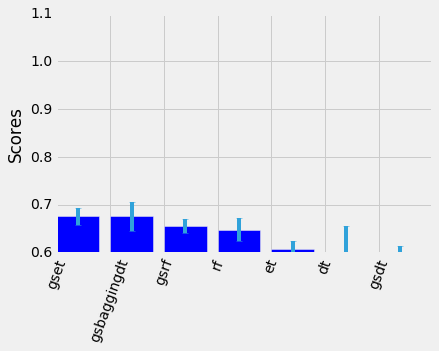

In [73]:
#create new dataframe with crossvals and errors
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=False)


#plot cross val scores and errors
fig, ax = plt.subplots()
rects1 = ax.bar(range(len(cvscores)), cvscores.score,
                yerr=cvscores.error,
                tick_label=cvscores.index)

#plot gen information
ax.set_ylabel('Scores')
plt.xticks(rotation=70)
plt.ylim(0.6, 1.1)

print cvscores


In [74]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc

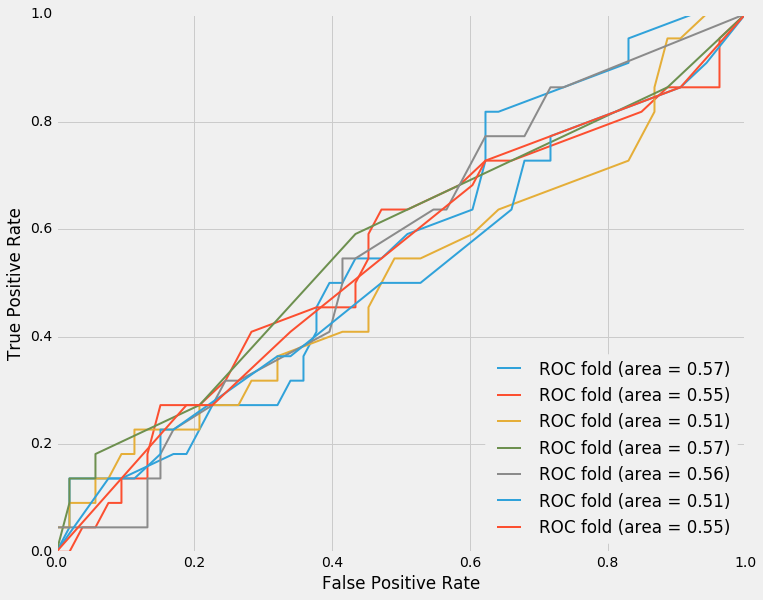

In [75]:
#ADAPTED FROM DOCUMENTATION FOR ROC CURVES
#mean_tpr = 0.0
#mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
i = 0

plt.figure(figsize=[11,9])

for k, v in all_models.iteritems():
    probas_ = v['model'].predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    #mean_tpr += interp(mean_fpr, fpr, tpr)
    #mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=lw, label='ROC fold (area = %0.2f)' % (roc_auc))
    
    i +=1
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [76]:
#troubleshooting
type(gsdt)

sklearn.grid_search.GridSearchCV